<a href="https://colab.research.google.com/github/orcuncakaar/orcuncakaar/blob/main/4_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('HRDataset_v14.csv')

In [35]:
print("Veri setinin ilk 5 satırı:")
print(df.head())

Veri setinin ilk 5 satırı:
              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  Termd  \
0            1       5            4                       0   62506      0   
1            5       3            3                       0  104437      1   
2            5       5            3                       0   64955      1   
3            1       5            3                       0   64991      0   
4            5       5            3                       0   50825      1   

   PositionID                  Position State  

In [36]:
print("\nVeri seti bilgisi:")
df.info()


Veri seti bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State          

In [37]:
print("\nSayısal sütunlar için temel istatistikler:")
print(df.describe())


Sayısal sütunlar için temel istatistikler:
              EmpID   MarriedID  MaritalStatusID    GenderID  EmpStatusID  \
count    311.000000  311.000000       311.000000  311.000000   311.000000   
mean   10156.000000    0.398714         0.810289    0.434084     2.392283   
std       89.922189    0.490423         0.943239    0.496435     1.794383   
min    10001.000000    0.000000         0.000000    0.000000     1.000000   
25%    10078.500000    0.000000         0.000000    0.000000     1.000000   
50%    10156.000000    0.000000         1.000000    0.000000     1.000000   
75%    10233.500000    1.000000         1.000000    1.000000     5.000000   
max    10311.000000    1.000000         4.000000    1.000000     5.000000   

           DeptID  PerfScoreID  FromDiversityJobFairID         Salary  \
count  311.000000   311.000000              311.000000     311.000000   
mean     4.610932     2.977492                0.093248   69020.684887   
std      1.083487     0.587072             

In [39]:
df['ManagerID'].fillna(df['ManagerID'].mode()[0], inplace=True)

/tmp/ipython-input-39-3248551134.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [40]:
date_cols = ['DOB', 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

/tmp/ipython-input-40-336458085.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [43]:
df_cleaned = df.drop(['Employee_Name', 'EmpID', 'Zip', 'DOB'], axis=1)

In [44]:
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns

In [45]:
correlation_matrix = df_cleaned[numeric_cols].corr()

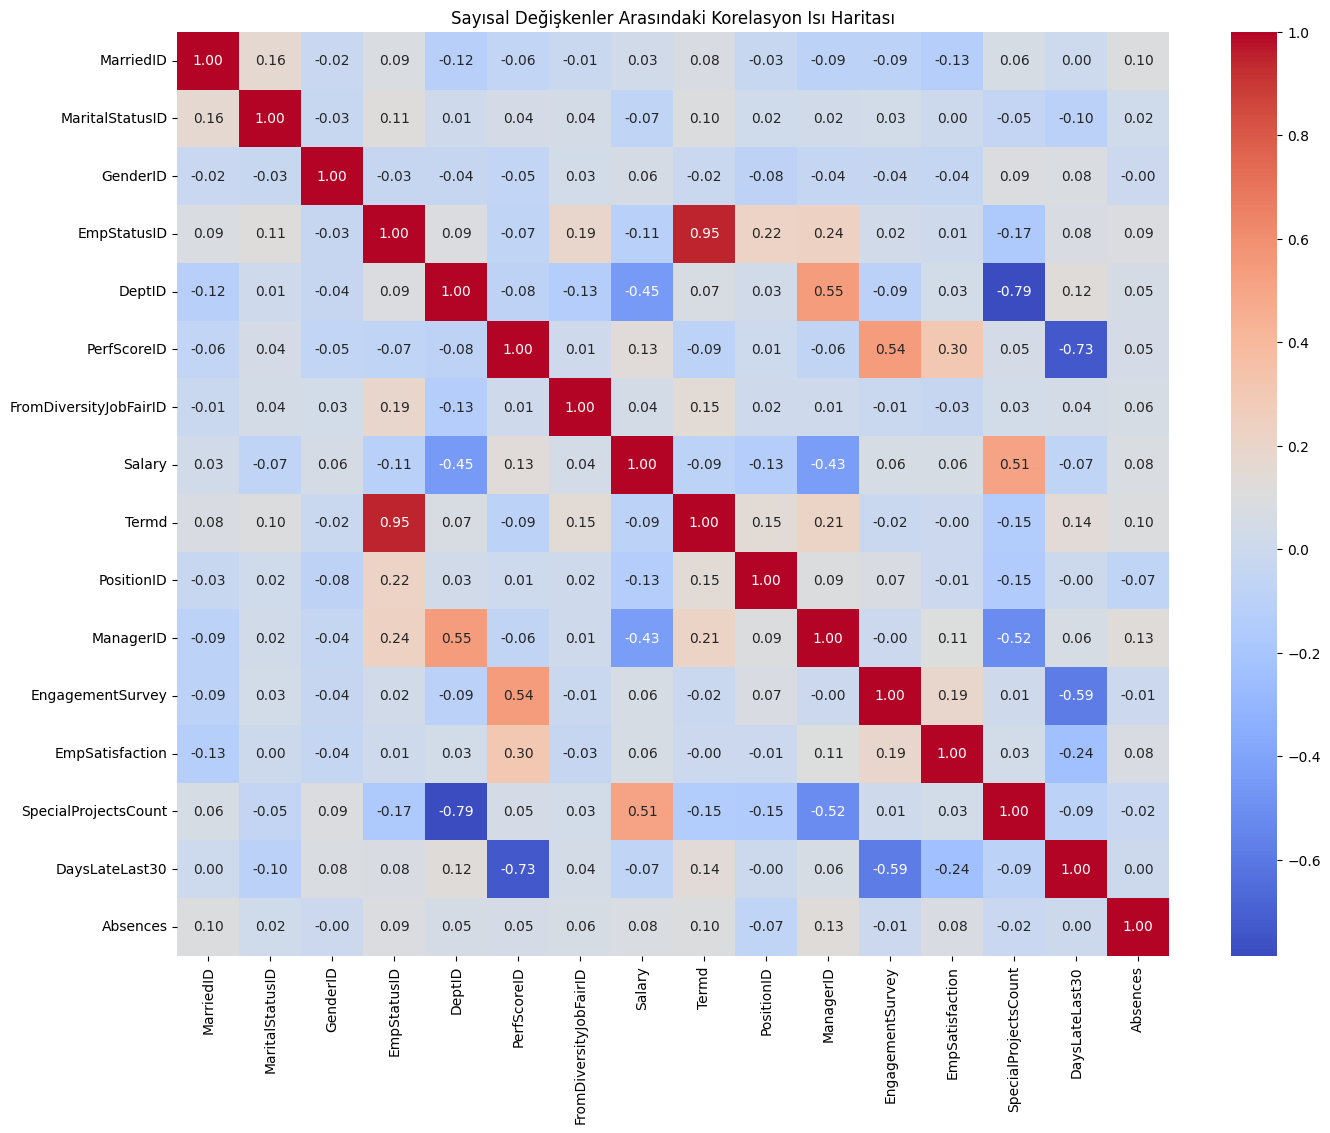

Veri ön işleme adımları tamamlandı ve 'correlation_heatmap.png' adıyla korelasyon ısı haritası oluşturuldu.

Maaş (Salary) ile en yüksek korelasyona sahip bazı değişkenler:
Salary                    1.000000
SpecialProjectsCount      0.508333
PerfScoreID               0.130903
Absences                  0.082382
EngagementSurvey          0.064966
EmpSatisfaction           0.062718
GenderID                  0.056097
FromDiversityJobFairID    0.041248
MarriedID                 0.026165
DaysLateLast30           -0.069443
Name: Salary, dtype: float64


In [46]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Sayısal Değişkenler Arasındaki Korelasyon Isı Haritası')
plt.show()

print("Veri ön işleme adımları tamamlandı ve 'correlation_heatmap.png' adıyla korelasyon ısı haritası oluşturuldu.")
print("\nMaaş (Salary) ile en yüksek korelasyona sahip bazı değişkenler:")
print(correlation_matrix['Salary'].sort_values(ascending=False).head(10))

In [47]:
today = df['DateofHire'].max()

In [48]:
df['Age'] = (today - df['DOB']).dt.days / 365.25

In [49]:
df['Years_of_Service'] = ((df['DateofTermination'].fillna(today)) - df['DateofHire']).dt.days / 365.25

In [50]:
df.loc[df['Years_of_Service'] < 0, 'Years_of_Service'] = 0

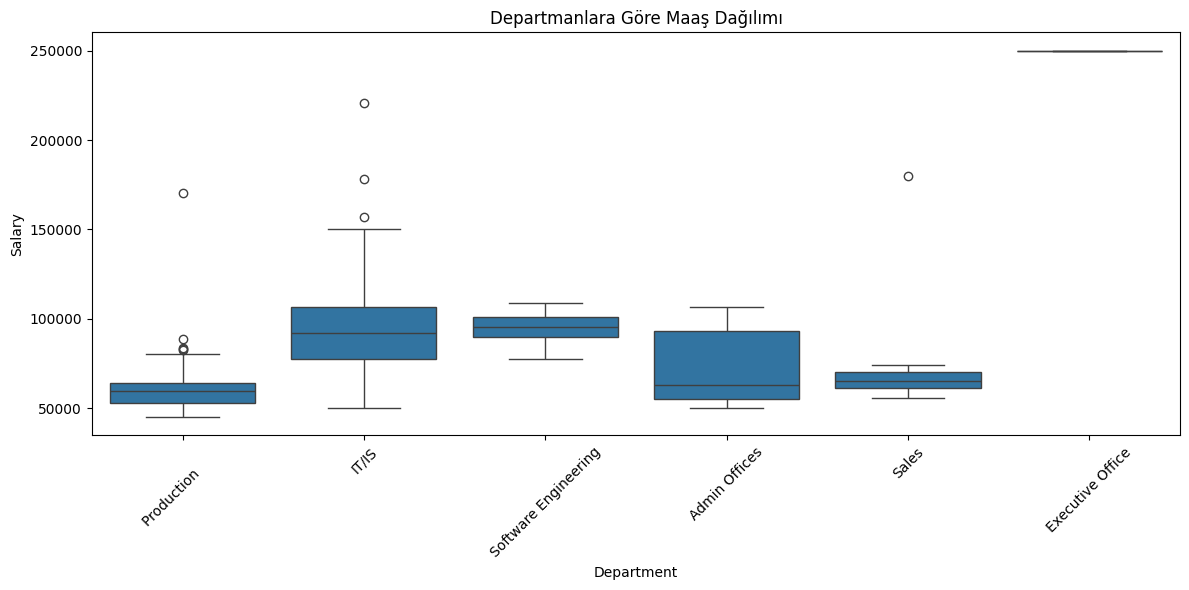

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Department', y='Salary')
plt.title('Departmanlara Göre Maaş Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

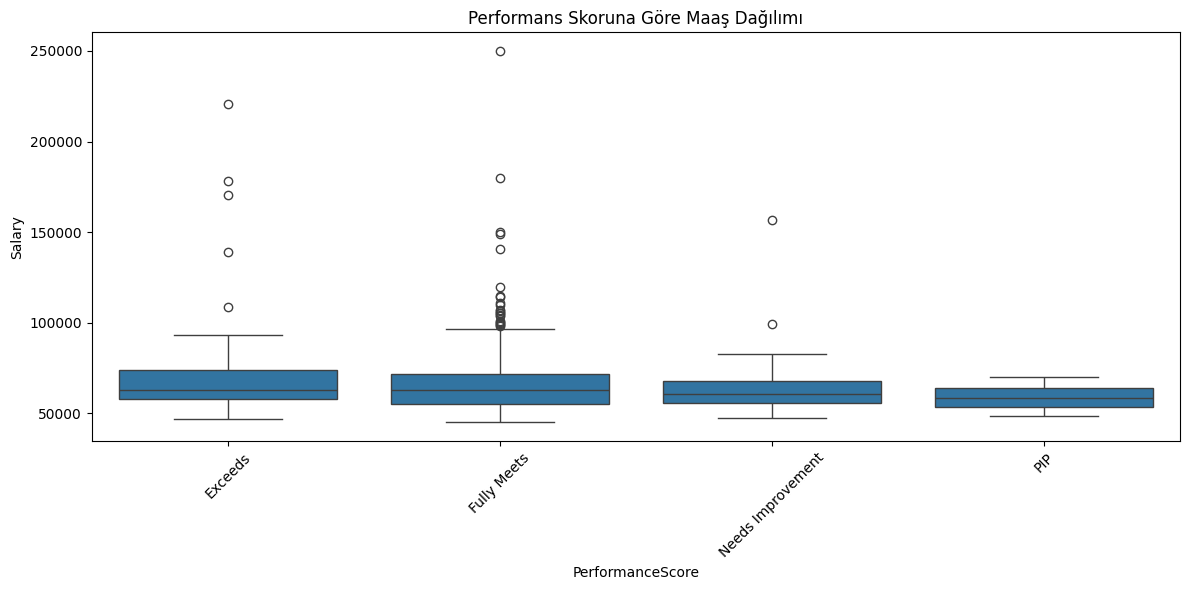

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='PerformanceScore', y='Salary')
plt.title('Performans Skoruna Göre Maaş Dağılımı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
top_10_positions = df['Position'].value_counts().nlargest(10).index

In [54]:
df_top10_pos = df[df['Position'].isin(top_10_positions)]

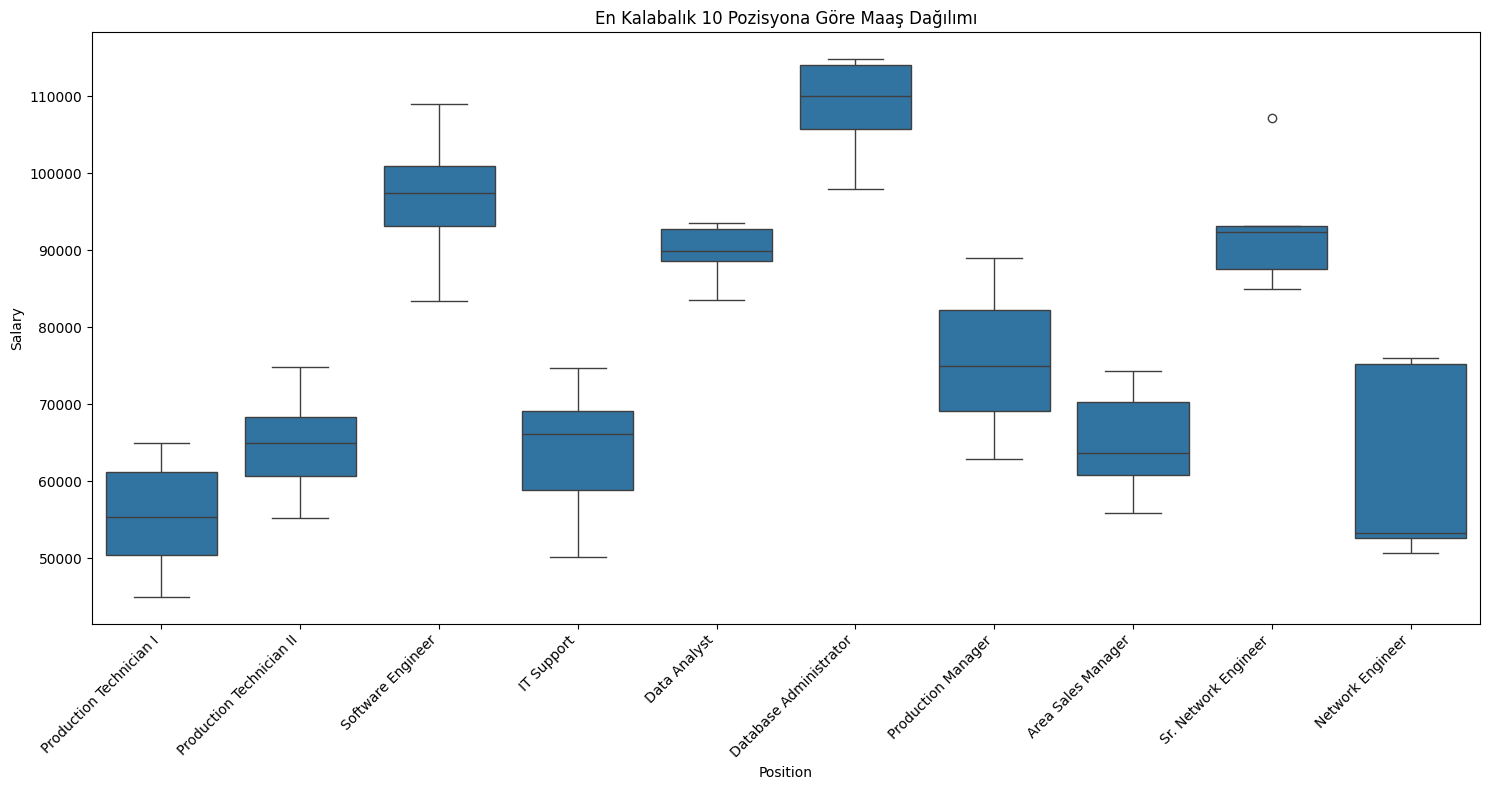

In [55]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_top10_pos, x='Position', y='Salary')
plt.title('En Kalabalık 10 Pozisyona Göre Maaş Dağılımı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [56]:
print("Yeni özellikler (Age, Years_of_Service) eklendi.")
print(df[['Employee_Name', 'Age', 'Years_of_Service', 'Salary']].head())

Yeni özellikler (Age, Years_of_Service) eklendi.
              Employee_Name        Age  Years_of_Service  Salary
0       Adinolfi, Wilson  K  34.997947          7.011636   62506
1  Ait Sidi, Karthikeyan     43.178645          1.215606  104437
2         Akinkuolie, Sarah  29.801506          1.223819   64955
3              Alagbe,Trina  29.779603         10.502396   64991
4          Anderson, Carol   28.832307          5.158111   50825


In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [70]:
y = df['Salary']
X = df.drop('Salary', axis=1)

In [71]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=np.number).columns

In [72]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded_categorical = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded_categorical.columns = encoder.get_feature_names_out(categorical_cols)

In [73]:
X_processed = pd.concat([X[numerical_cols], X_encoded_categorical], axis=1)
X_processed.drop(['EmpID', 'ManagerID', 'PositionID', 'DeptID', 'PerfScoreID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'FromDiversityJobFairID'], axis=1, inplace=True, errors='ignore')
X_processed.drop(['DateofHire'], axis=1, inplace=True, errors='ignore')

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [75]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

In [76]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'MSE': mse, 'R2 Score': r2}

In [77]:
results_df = pd.DataFrame(results).T
print("Tüm Regresyon Modelleri için Değerlendirme Sonuçları:")
print(results_df)

Tüm Regresyon Modelleri için Değerlendirme Sonuçları:
                                 MAE           MSE  R2 Score
Linear Regression        8885.851020  2.532963e+08  0.687067
Ridge Regression         9119.797895  2.721763e+08  0.663741
Random Forest Regressor  9470.132857  3.728649e+08  0.539346


In [78]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [79]:
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid_rf,
                              cv=3,
                              n_jobs=-1,
                              verbose=0,
                              scoring='r2')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [80]:
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"En iyi Random Forest R2 Skoru: {r2_rf:.4f}")
print("En iyi parametreler:", grid_search_rf.best_params_)

En iyi Random Forest R2 Skoru: 0.4624
En iyi parametreler: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [81]:
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga']
}

In [82]:
grid_search_ridge = GridSearchCV(estimator=Ridge(random_state=42),
                                 param_grid=param_grid_ridge,
                                 cv=5,
                                 scoring='r2',
                                 n_jobs=-1,
                                 verbose=0)
grid_search_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga']},
             scoring='r2')

In [83]:
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"En iyi Ridge R2 Skoru: {r2_ridge:.4f}")
print("En iyi parametreler:", grid_search_ridge.best_params_)

En iyi Ridge R2 Skoru: 0.6848
En iyi parametreler: {'alpha': 0.1, 'solver': 'auto'}


In [84]:
tuned_results = {
    "Tuned Random Forest": {
        "MAE": mean_absolute_error(y_test, y_pred_rf),
        "MSE": mean_squared_error(y_test, y_pred_rf),
        "R2 Score": r2_rf
    },
    "Tuned Ridge": {
        "MAE": mean_absolute_error(y_test, y_pred_ridge),
        "MSE": mean_squared_error(y_test, y_pred_ridge),
        "R2 Score": r2_ridge
    }
}
tuned_results_df = pd.DataFrame(tuned_results).T
print("\nHiperparametre Optimizasyonu Sonrası Değerlendirme Sonuçları:")
print(tuned_results_df)


Hiperparametre Optimizasyonu Sonrası Değerlendirme Sonuçları:
                              MAE           MSE  R2 Score
Tuned Random Forest  10950.755238  4.351293e+08  0.462422
Tuned Ridge           8894.354127  2.550997e+08  0.684839


In [87]:
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [88]:
numeric_transformer = StandardScaler()

In [89]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Veri hazırlığını tekrar yapalım
df = pd.read_csv('HRDataset_v14.csv')
df['ManagerID'].fillna(df['ManagerID'].mode()[0], inplace=True)
date_cols = ['DOB', 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')
today = df['DateofHire'].max()
df['Age'] = (today - df['DOB']).dt.days / 365.25
df['Years_of_Service'] = ((df['DateofTermination'].fillna(today)) - df['DateofHire']).dt.days / 365.25
df.loc[df['Years_of_Service'] < 0, 'Years_of_Service'] = 0

# Kullanılmayacak sütunları ve hedef değişkeni ayıralım
df_model = df.drop(['Employee_Name', 'EmpID', 'DOB', 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date', 'TermReason', 'Termd'], axis=1)

y = df_model['Salary']
X = df_model.drop('Salary', axis=1)

# Kategorik ve sayısal sütunları ayıralım
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# Eğitim ve test setlerini ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ön işleme adımlarını tanımlayalım
# Sayısal özellikler için: Ölçeklendirme
numeric_transformer = StandardScaler()

# Kategorik özellikler için: One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# ColumnTransformer ile ön işleme adımlarını birleştirelim
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Geriye kalan sütunlara dokunma
)

# Yeni modelleri tanımlayalım
models = {
    'Lasso': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

results = {}
# Her model için bir pipeline oluşturup eğitelim ve değerlendirelim
for name, model in models.items():
    # Pipeline: Önce ön işleme adımları, sonra model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])

    # Modeli eğitelim
    pipeline.fit(X_train, y_train)

    # Test seti üzerinde tahmin yapalım
    y_pred = pipeline.predict(X_test)

    # Performans metriklerini hesaplayalım
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'MSE': mse, 'R2 Score': r2}

# Sonuçları gösterelim
results_df = pd.DataFrame(results).T
print("Yeni Regresyon Modelleri için Değerlendirme Sonuçları:")
print(results_df)

/tmp/ipython-input-91-2718053096.py:15: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-91-2718053096.py:18: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1764676444.05717

Yeni Regresyon Modelleri için Değerlendirme Sonuçları:
                            MAE           MSE  R2 Score
Lasso               9918.396981  3.686553e+08  0.544547
ElasticNet         11516.491485  4.632000e+08  0.427742
SVR                15971.616152  8.947191e+08 -0.105375
Gradient Boosting   9051.192585  3.613907e+08  0.553522
KNN                10790.215873  3.871560e+08  0.521691
